In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from experiment_mnist import *
from tfshow import *

Using TensorFlow backend.


In [2]:
methods = ['l1', 'l2', 'delta', 'dropout', 'none']
activations = ['sigmoid', 'relu']
layers = [1,2,3,4,5,6]
reg_coeff = np.logspace(-3,3,10)

### Relu, 5 layers, 10x neurons, 0.4 dropout, K = 2

In [3]:
Layers = 3
N = [10] * Layers
P = [0.5] + [0] * (Layers - 1)
KLips = 2
epochs = 500
activation = 'relu'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 500/500 [02:28<00:00,  3.40it/s]


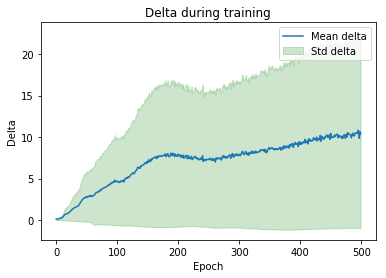

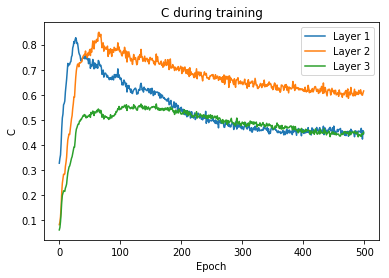

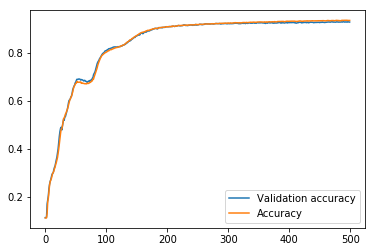

Creating network for 784-dimensional input and 10-dimensional output, with 3 hidden layers


In [4]:
model_no_reg = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = 'delta',
                             reg_coeff = 0, do_print = True, scaler = 1.0)

### Running the model

100%|██████████| 2000/2000 [00:21<00:00, 91.30it/s]


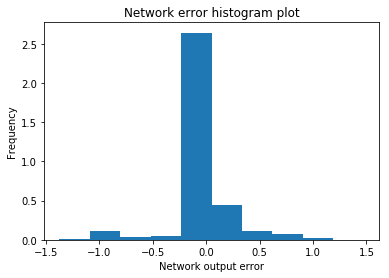

Error; maximal over inputs, average over dropout:
True values array mean: 0.099970 variance 0.280748
Experiment 0.829284 Std 0.599889
Equation   10.377522 Std 11.328090
Tightness  8.0% Std 5.3%


(0.8292842, 0.5998891, 10.377522301009838, 11.328090058854208, 0.28074822)

In [5]:
model_no_reg.update_C(model_no_reg.get_inputs(10000))
model_no_reg.run(inputs = 2000, repetitions = 1000)

### Calculating accuracy

In [6]:
acc_no_reg = model_no_reg.get_accuracy(5000, 5000, tqdm_ = tqdm)
print(acc_no_reg)

100%|██████████| 5000/5000 [04:29<00:00, 18.20it/s]

0.46532592


In [7]:
acc_no_reg_orig = model_no_reg.get_accuracy(5000, 5000, tqdm_ = tqdm, no_dropout = True)
print(acc_no_reg_orig)

100%|██████████| 5000/5000 [00:01<00:00, 4309.77it/s]

0.933


### Comparing regularizers

In [ ]:
# method: l1/l2/delta
def plot_error(method = 'l1', coeffs = np.logspace(-10, 1, 30)):
    models = {}
    fail_accs = []
    orig_accs = []
    for coeff in coeffs:
        models[coeff] = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = method,
                                 reg_coeff = coeff, do_print = True)
        fail_accs += [models[coeff].get_accuracy(5000, 5000)]
        orig_accs += [models[coeff].get_accuracy(5000, no_dropout = True)]
        K.clear_session()
    plt.figure()
    plt.title(method + ' and resilience')
    plt.xlabel('Regularization coefficient')
    plt.ylabel('Accuracy')
    plt.plot(coeffs, fail_accs, label = 'Dropout')
    plt.plot(coeffs, orig_accs, label = 'No dropout')
    plt.plot(coeffs, [acc_no_reg] * len(coeffs), label = 'No reg, dropout')
    plt.plot(coeffs, [acc_no_reg_orig] * len(coeffs), label = 'No reg, no dropout')
    plt.xscale('log')
    plt.legend()
    plt.savefig(method + '.png')
    plt.show()

In [ ]:
plot_error('delta', coeffs = np.logspace(-10, 0, 20))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 500/500 [01:41<00:00,  4.94it/s]


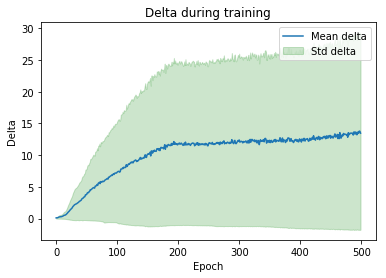

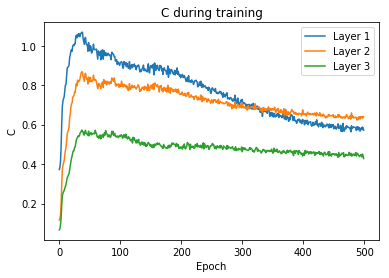

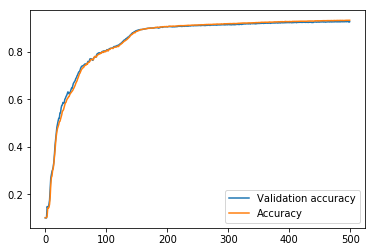

Creating network for 784-dimensional input and 10-dimensional output, with 3 hidden layers


In [ ]:
plot_error('l1', coeffs = np.logspace(-8, 0, 20))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 500/500 [01:40<00:00,  5.07it/s]


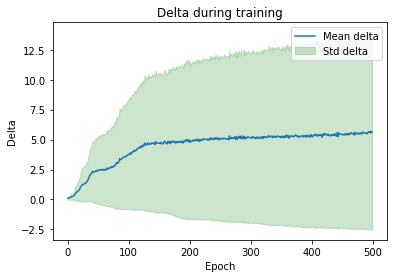

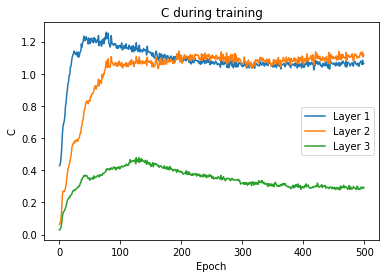

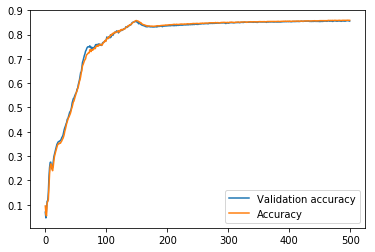

Creating network for 784-dimensional input and 10-dimensional output, with 3 hidden layers


In [8]:
model_reg = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = 'delta',
                             reg_coeff = 1e-4, do_print = True, scaler = 1.0)

100%|██████████| 2000/2000 [00:22<00:00, 87.55it/s]


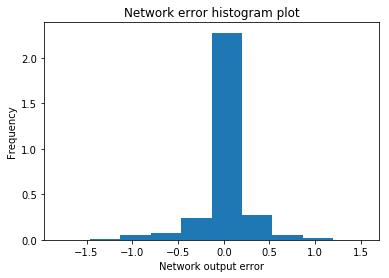

Error; maximal over inputs, average over dropout:
True values array mean: 0.099966 variance 0.263098
Experiment 0.862729 Std 0.661425
Equation   5.514102 Std 7.936777
Tightness  15.6% Std 8.3%


(0.86272925, 0.6614245, 5.514102202026134, 7.936776956399023, 0.26309848)

In [9]:
model_reg.update_C(model_reg.get_inputs(10000))
model_reg.run(inputs = 2000, repetitions = 1000)

In [10]:
acc_reg = model_reg.get_accuracy(5000, 5000, tqdm_ = tqdm)
print(acc_reg)

100%|██████████| 5000/5000 [04:45<00:00, 17.53it/s]

0.45404348


In [11]:
acc_reg_orig = model_reg.get_accuracy(5000, 5000, tqdm_ = tqdm, no_dropout = True)
print(acc_reg_orig)

100%|██████████| 5000/5000 [00:01<00:00, 4073.30it/s]

0.8556
